In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('data.xlsx - Sheet1.csv')

In [9]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.columns=df.columns.str.strip()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [12]:
df=df.drop(columns=['Unnamed: 0','CollegeCityID'])
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [13]:
 df['DOJ']=pd.to_datetime(df['DOJ'])
df['DOB']=pd.to_datetime(df['DOB'])
df['12graduation']=pd.to_datetime(df['12graduation'])
df['GraduationYear']=pd.to_datetime(df['GraduationYear'])


In [14]:
# check for 0 and -1

In [15]:
print((df==-1).sum()[(df== -1).sum() > 0 ])

Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
dtype: int64


In [16]:
print((df==0).sum()[(df== 0).sum() > 0 ])


CollegeCityTier    2797
dtype: int64


In [18]:
df['Domain']=df['Domain'].replace(-1,0,inplace= True)
df['ComputerProgramming']=df['ComputerProgramming'].replace(-1, 0, inplace=True)
df['ElectronicsAndSemicon']=df['ElectronicsAndSemicon'].replace(-1,0,inplace=True)
df['ComputerScience']=df['ComputerScience'].replace(-1,0,inplace= True)
df['MechanicalEngg']=df['MechanicalEngg'].replace(-1,0,inplace= True)
df['ElectricalEngg']=df['ElectricalEngg'].replace(-1,0,inplace= True)
df['TelecomEngg']=df['TelecomEngg'].replace(-1,0,inplace= True)
df['CivilEngg']=df['CivilEngg'].replace(-1,0,inplace= True)

In [19]:
numerical_features = list(df.select_dtypes(include=['number']).columns)
print(numerical_features)


['ID', 'Salary', '10percentage', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [20]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [21]:
# Print the list of categorical columns
print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'],
      dtype='object')


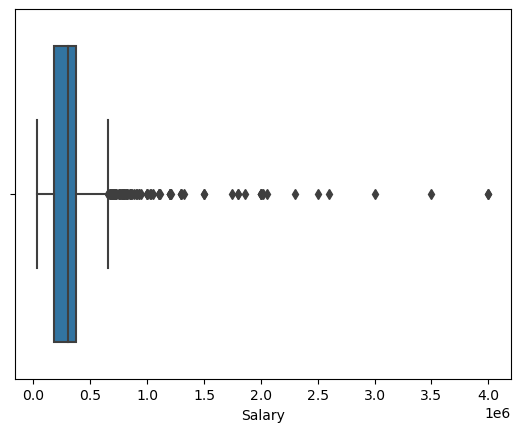

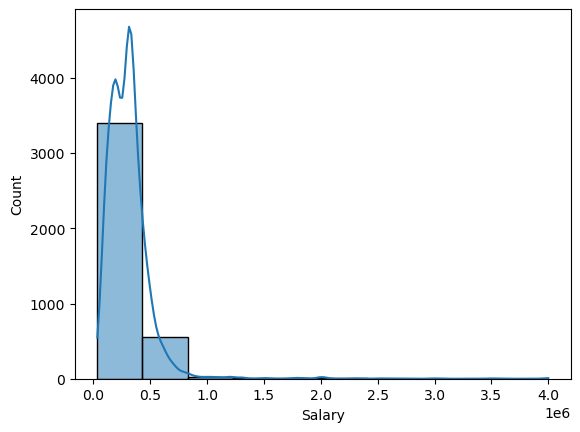

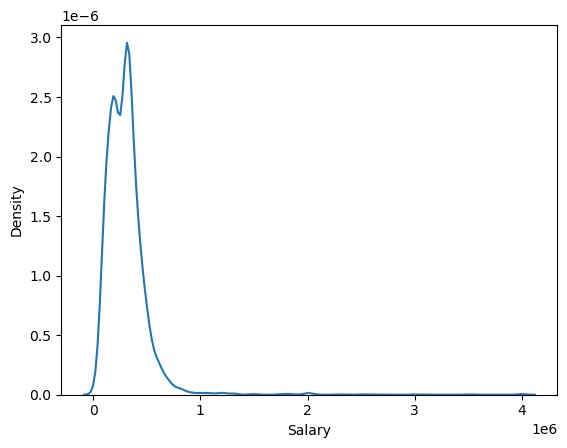

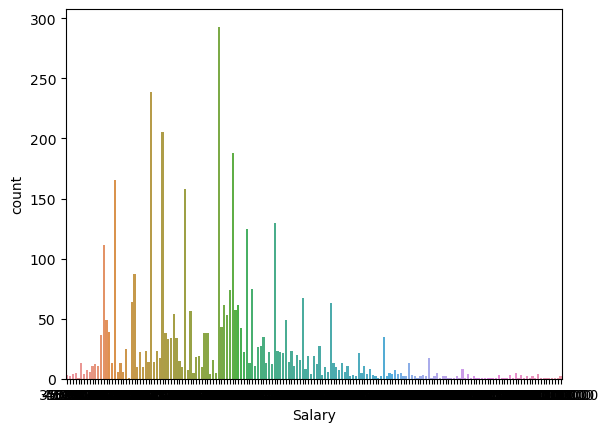

In [25]:
#boxplot
sns.boxplot(data=df, x='Salary')
plt.show()
#histplot
sns.histplot(data=df, x='Salary', kde=True, bins=10)
plt.show()
#pdfplot
sns.kdeplot(data=df, x='Salary')
plt.show()
#countplot
sns.countplot(data=df, x='Salary')
plt.show()


OBSERVATIONS:
- Boxplot –> In the salary column we can see that the large number of
outliers are present,to make the data more clear we can remove the data that is > 2.0 
- Histplot –> The data is right skewed
- countplot –> The data is right skewed and the highest count of salary
is greaterthan 250

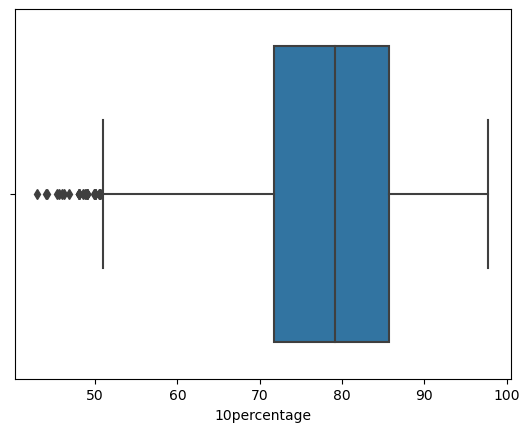

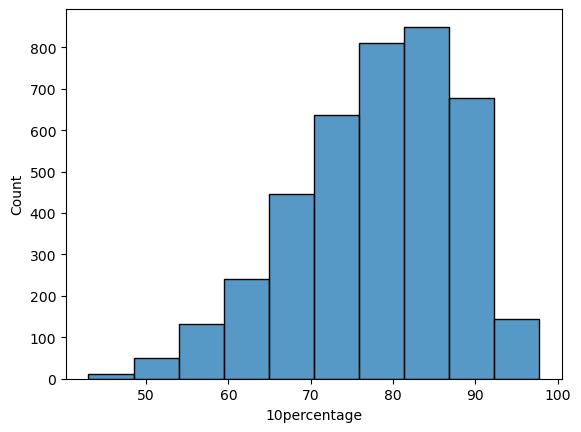

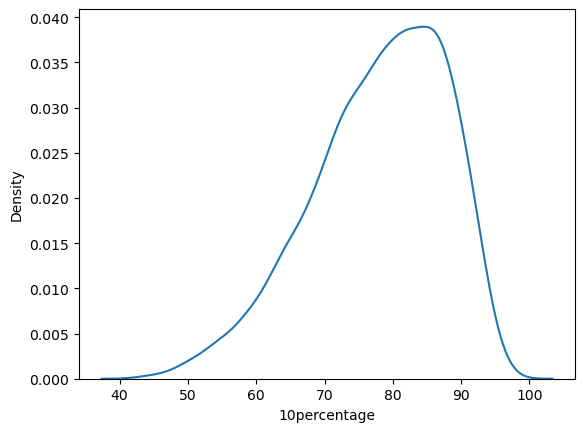

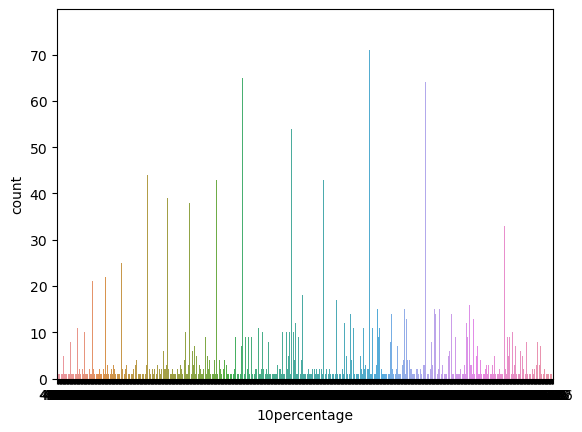

In [27]:
sns.boxplot(data=df, x='10percentage')
plt.show()
sns.histplot(data=df, x='10percentage', kde=False, bins=10)
plt.show()
sns.kdeplot(data=df, x='10percentage')
plt.show()
sns.countplot(data=df, x='10percentage')
plt.show()


OBSERVATIONS:
- Boxplot –> We can say that average 10percentage is 80 and there are
some outliers which are less than 50 
- Histplot –> The data is left skewed and from plot we can
tell that avg percentage lies between 80 and 90


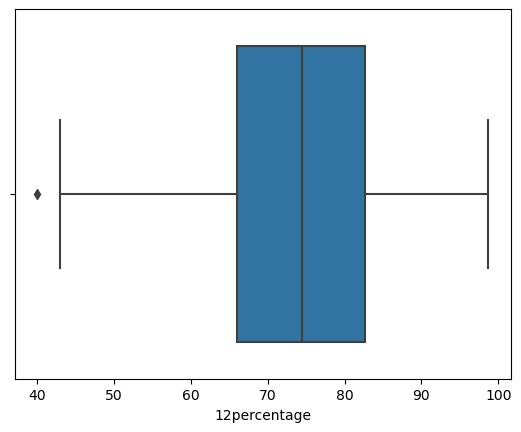

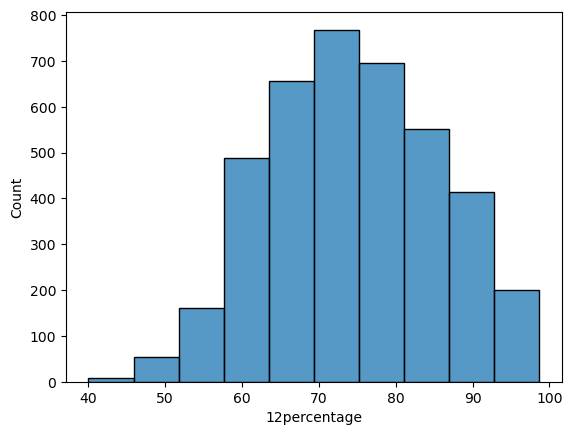

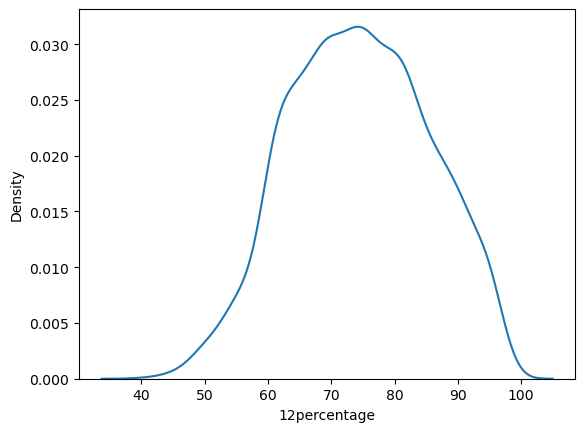

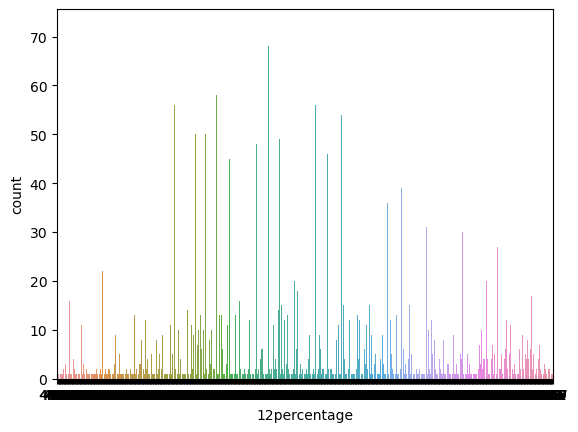

In [28]:
 sns.boxplot(data=df, x='12percentage')
plt.show()
sns.histplot(data=df, x='12percentage', kde=False, bins=10)
plt.show()
sns.kdeplot(data=df, x='12percentage')
plt.show()
sns.countplot(data=df, x='12percentage')
plt.show()


OBSERVATIONS: 
- Boxplot –> The maximum percentage lies between 70 and 80 and there is
only one outlier which can be removed 
- Histplot –> The graph is left skewed and we can observe
high values between 60 to 85 
- Countplot –> We can observe that more counts lie between 50 and
70

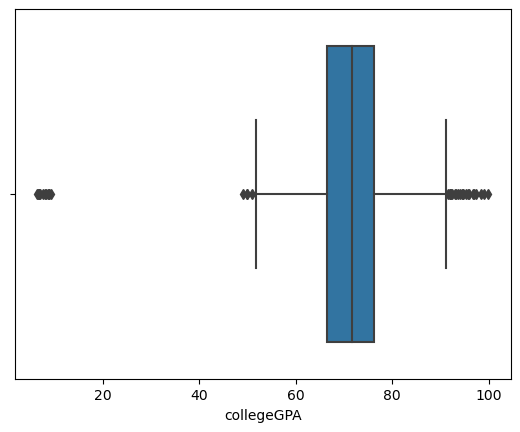

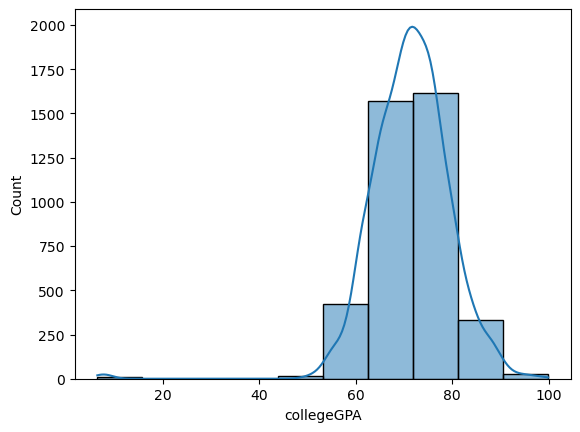

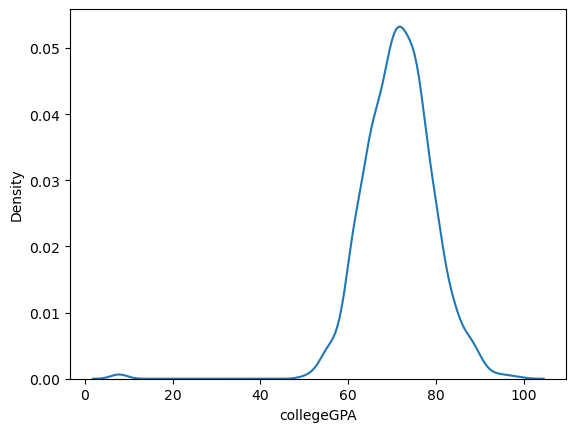

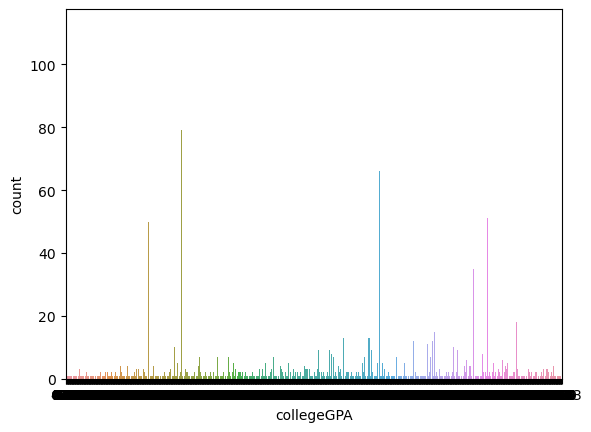

In [29]:
sns.boxplot(data=df, x='collegeGPA')
plt.show()
sns.histplot(data=df, x='collegeGPA', kde=True, bins=10)
plt.show()
sns.kdeplot(data=df, x='collegeGPA')
plt.show()
sns.countplot(data=df, x='collegeGPA')
plt.show()


OBSERVATIONS: 
- Boxplot –> The avg value is at 70. we can say that max CGPA lies in
between 60 and 80 . There are only some outliers which are less than 20 
- Histplot –> The data is
left skewed and highest count is at 2000 for CGPA in between 70 and 80


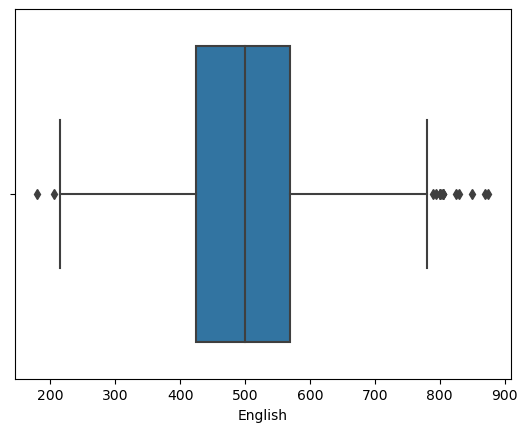

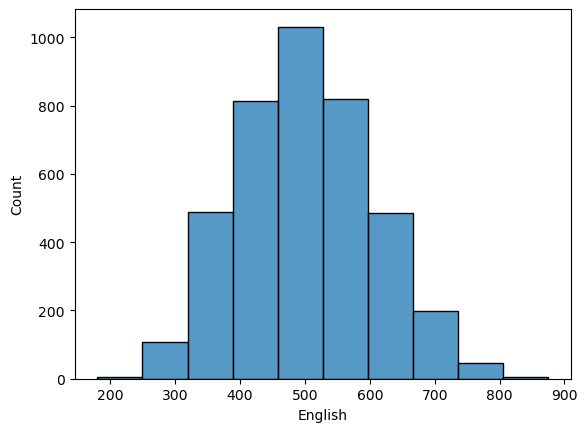

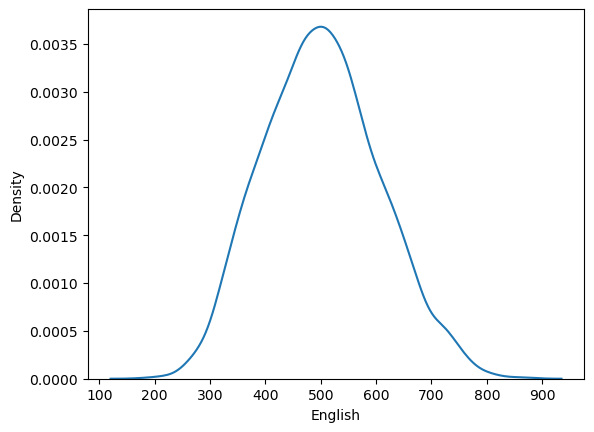

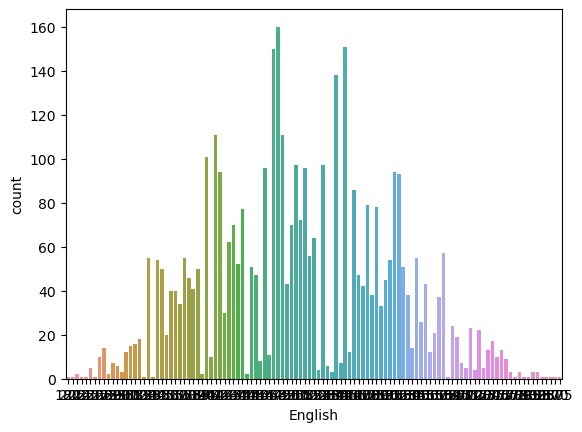

In [31]:
 sns.boxplot(data=df, x='English')
plt.show()
sns.histplot(data=df, x='English', kde=False, bins=10)
plt.show()
sns.kdeplot(data=df, x='English')
plt.show()
sns.countplot(data=df, x='English')
plt.show()


OBSERVATIONS:
- Boxplot –> The avg value is at 500 and there are more outliers which are
greater than 800      
- Histplot –> This is a Normal Distribution graph


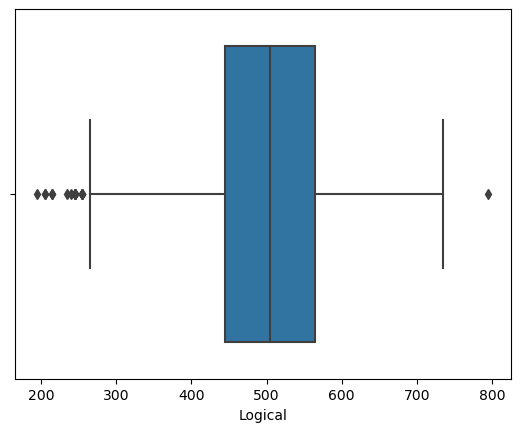

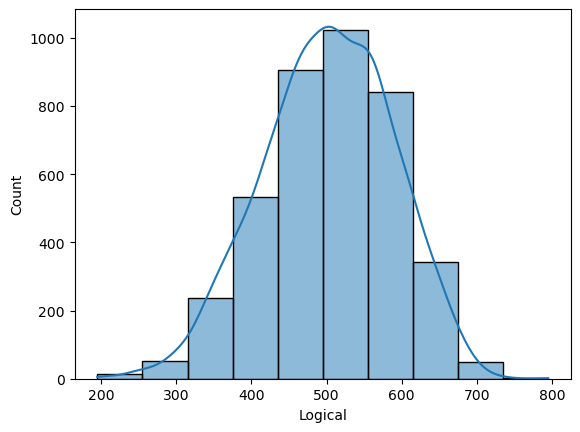

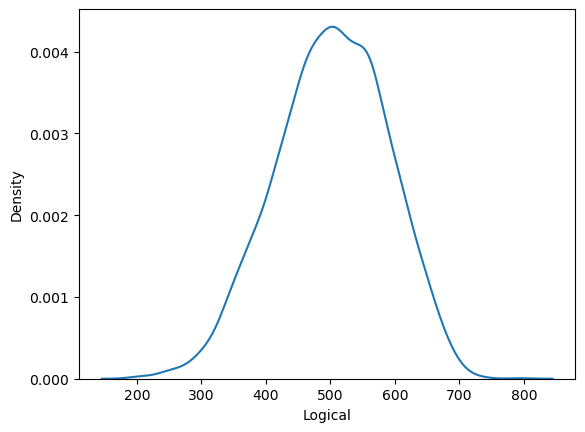

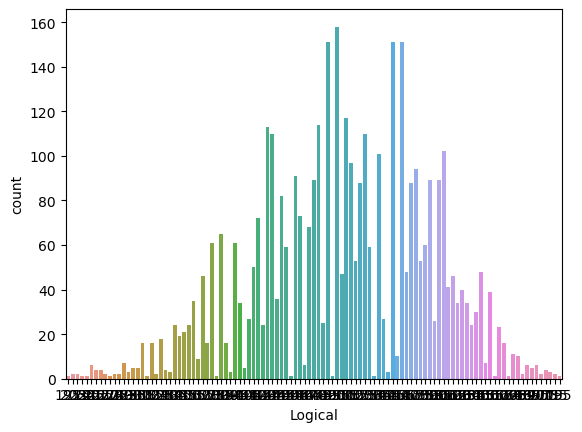

In [32]:
sns.boxplot(data=df, x='Logical')
plt.show()
sns.histplot(data=df, x='Logical', kde=True, bins=10)
plt.show()
sns.kdeplot(data=df, x='Logical')
plt.show()
sns.countplot(data=df, x='Logical')
plt.show()


OBSERVATIONS:
- Boxplot –> The avg value is at 500 and there are more outliers which are
greater than 800 
- Histplot –> This is a Normal Distribution graph


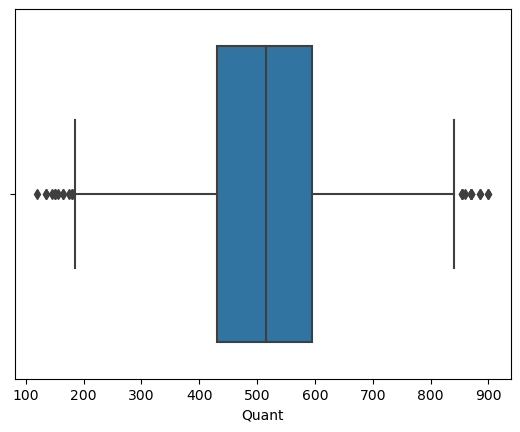

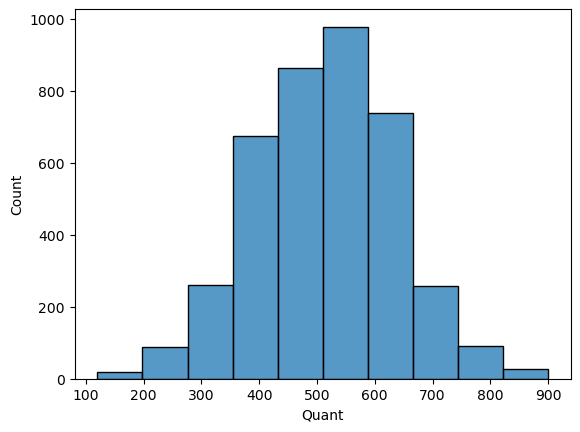

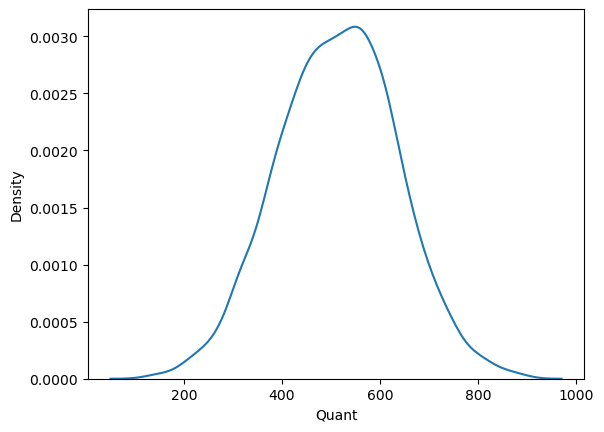

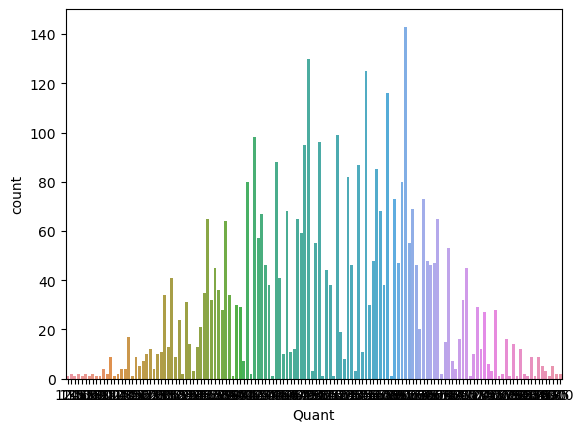

In [33]:
sns.boxplot(data=df, x='Quant')
plt.show()
sns.histplot(data=df, x='Quant', kde=False, bins=10)
plt.show()
sns.kdeplot(data=df, x='Quant')
plt.show()
sns.countplot(data=df, x='Quant')
plt.show()


##For categorical Data

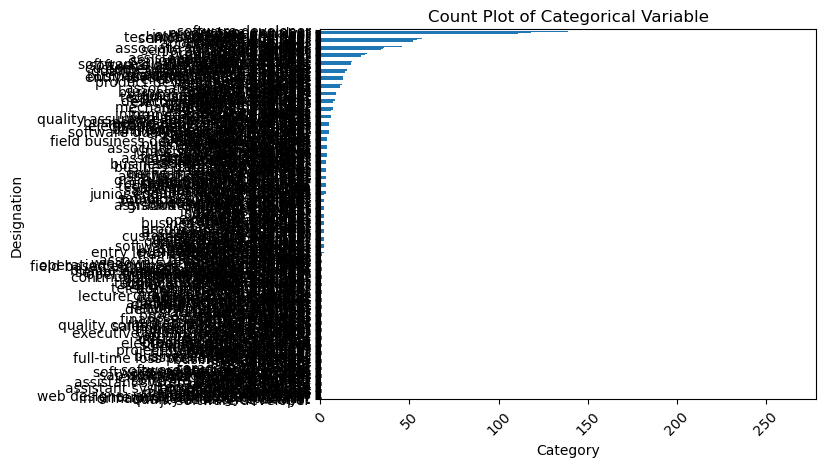

In [34]:
df['Designation'].value_counts()[1:].sort_values(ascending= True).plot(kind='barh')
plt.xlabel('Category')
plt.ylabel('Designation')
plt.title('Count Plot of Categorical Variable')
plt.xticks(rotation=45)
plt.show()


OBSERVATIONS:
- For above plot we can see that the data is too large and we couldnot analysis
well.So, we can create the graph with more repeating values

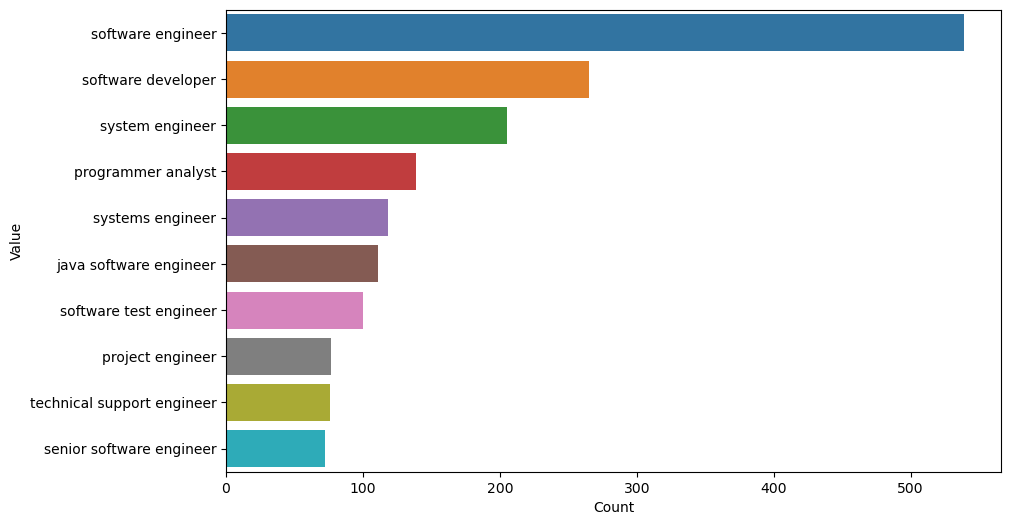

In [35]:
value_counts = df['Designation'].value_counts()
top_n = 10
top_values = value_counts.nlargest(top_n)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Value')
plt.show()


OBSERVATIONS:
- From the above bar plot we can observe that most of the members are
software engineer and software developer


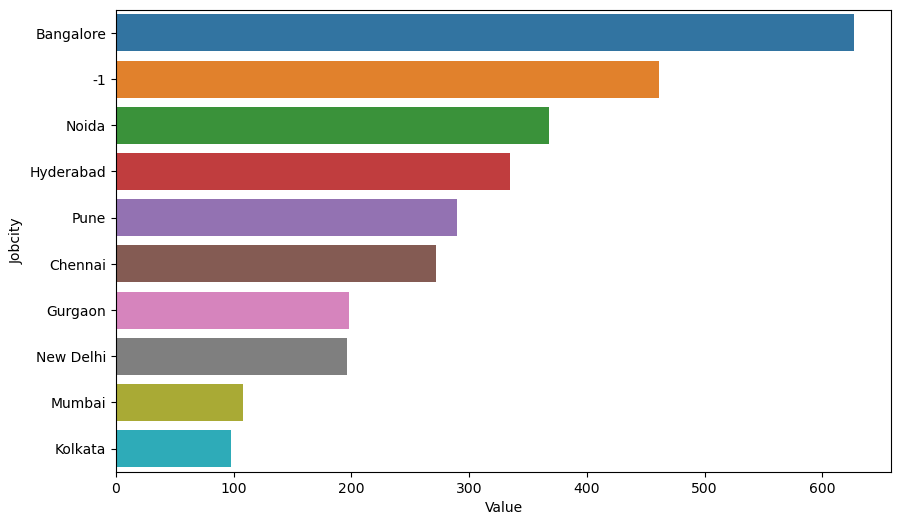

In [37]:
value_counts = df['JobCity'].value_counts()
# Select the top N most frequent values
top_n = 10 # Change this number to adjust the number of values to include in the plot
top_values = value_counts.nlargest(top_n)
# Plot the horizontal bar plot
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.xlabel('Value')
plt.ylabel('Jobcity')
plt.show()


OBSERVATIONS:
   - From the above bar plot we can tell that most of the members are working
in Banglore , Noida ,Hyderabad

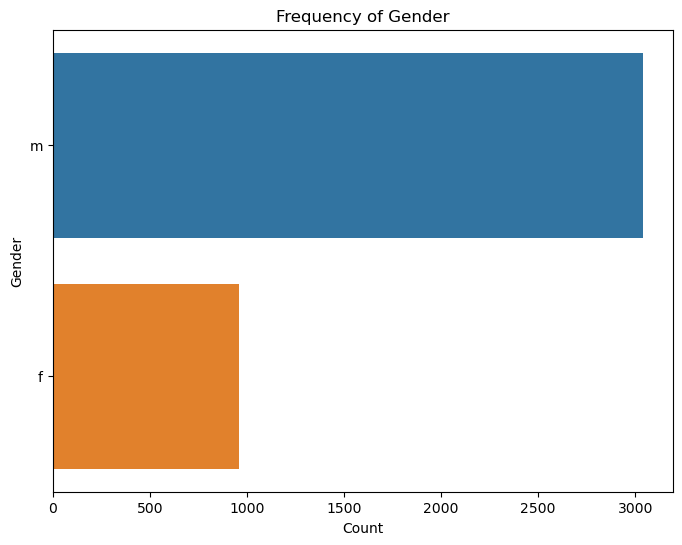

In [38]:
 gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.values, y=gender_counts.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Frequency of Gender')
plt.show()


OBSERVATIONS:
- From the above bar plot we can tell that the frequency of male is much
higher compared to female

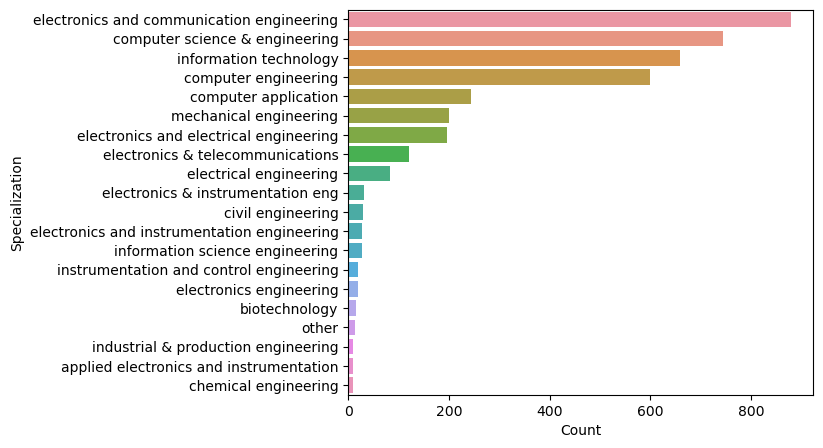

In [39]:
value_counts = df['Specialization'].value_counts()
# Select the top N most frequent values
top_n = 20 # Change this number to adjust the number of values to include in the plot
top_values = value_counts.nlargest(top_n)
# Plot the horizontal bar plot
plt.figure(figsize=(6, 5)) # Adjust the figure size as needed
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()


OBSERVATIONS: 
- From the above plot we can tell that most of them are from elctronics and
communication engineering (ece) , computer sciences.


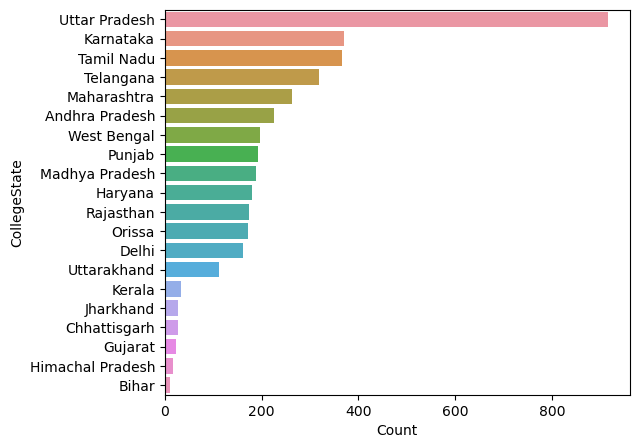

In [40]:
value_counts = df['CollegeState'].value_counts()
# Select the top N most frequent values
top_n = 20 # Change this number to adjust the number of values to include in the plot
top_values = value_counts.nlargest(top_n)
# Plot the horizontal bar plot
plt.figure(figsize=(6, 5)) # Adjust the figure size as needed
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.xlabel('Count')
plt.ylabel('CollegeState')
plt.show()

OBSERVATIONS:
   - From the above plot we can say that there are most graduates from Uttar
Pradesh (>800).

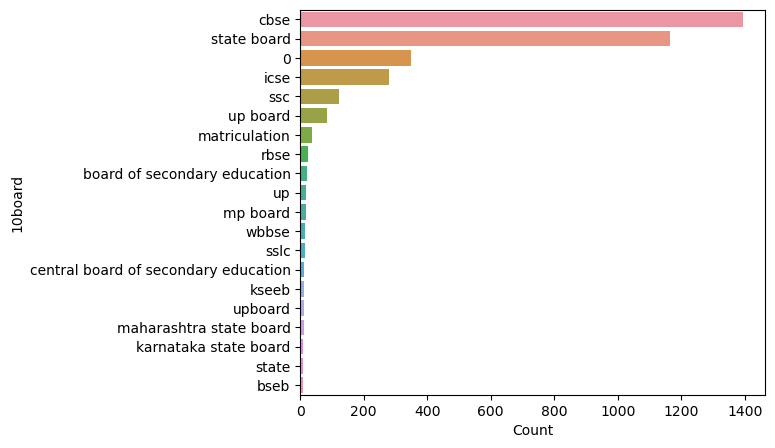

In [41]:
 value_counts = df['10board'].value_counts()
# Select the top N most frequent values
top_n = 20 # Change this number to adjust the number of values to include in the plot
top_values = value_counts.nlargest(top_n)
# Plot the horizontal bar plot
plt.figure(figsize=(6, 5)) # Adjust the figure size as needed
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.xlabel('Count')
plt.ylabel('10board')
plt.show()


OBSERVATIONS:
- From the above plot we can say that most of them have completed there
10th board under cbse and state board.

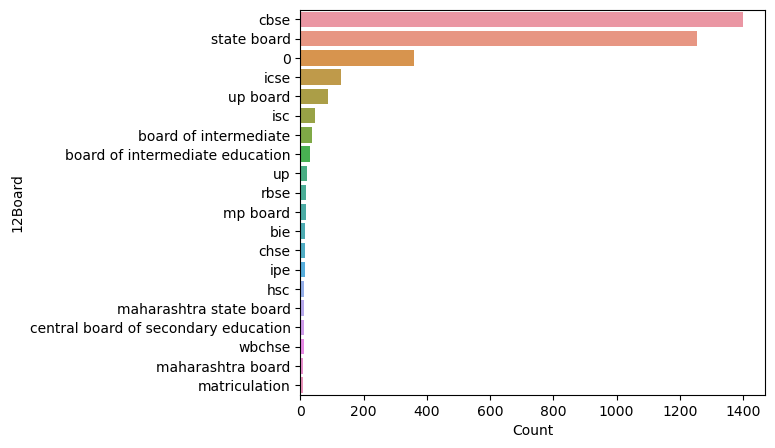

In [43]:
 value_counts = df['12board'].value_counts()
# Select the top N most frequent values
top_n = 20 # Change this number to adjust the number of values to include in the plot
top_values = value_counts.nlargest(top_n)
# Plot the horizontal bar plot
plt.figure(figsize=(6, 5)) # Adjust the figure size as needed
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.xlabel('Count')
plt.ylabel('12Board')
plt.show()


OBSERVATIONS:
- From the above plot we can say that most of them have completed there
10th board under cbse and state board.

## Bivarient Analysis

### Numerical vs Numerical

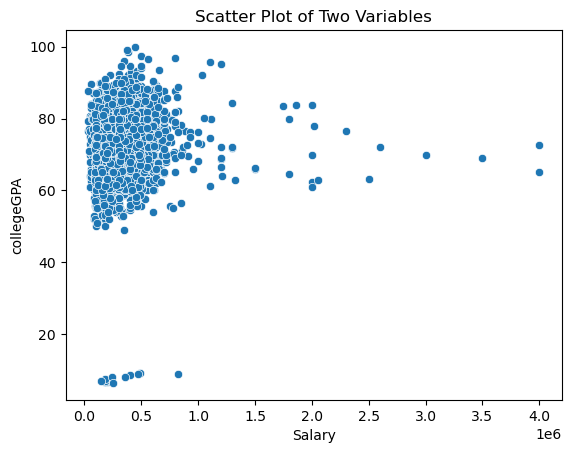

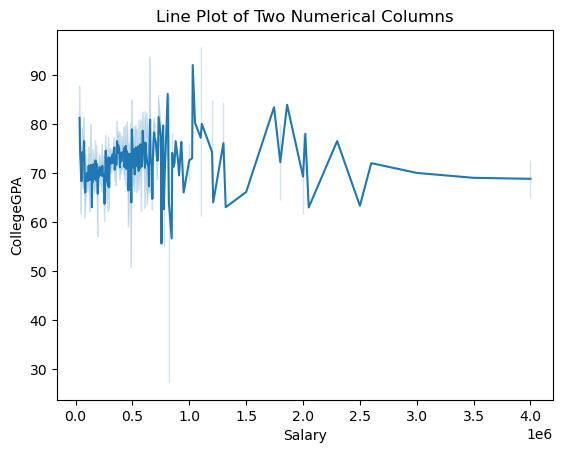

In [44]:
sns.scatterplot(data=df, x='Salary', y='collegeGPA')
plt.xlabel('Salary')
plt.ylabel('collegeGPA')
plt.title('Scatter Plot of Two Variables')
plt.show()
sns.lineplot(data=df, x='Salary', y='collegeGPA')
plt.xlabel('Salary')
plt.ylabel('CollegeGPA')
plt.title('Line Plot of Two Numerical Columns')
plt.show()

OBSERVATIONS: 
 - Scatterplot –> From the above scatter plot we can observe that college
gpa of large number lies between 60 and 80 and most of the salary lies between 0 and 1 
 - Lineplot–> From the line plot we can observe that max gpa is 70 and highest salary is at 4.0


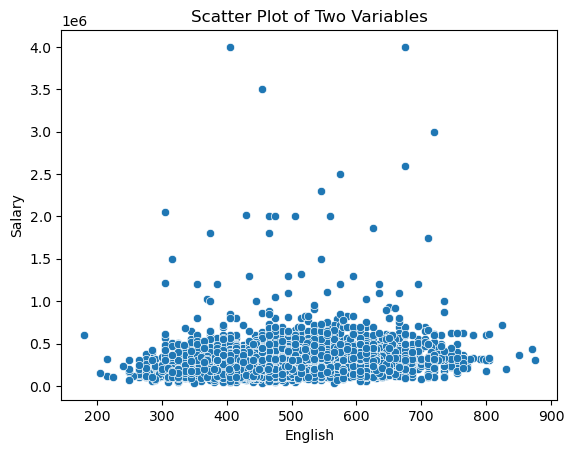

In [45]:
sns.scatterplot(data=df, y='Salary', x='English')
plt.xlabel('English')
plt.ylabel('Salary')
plt.title('Scatter Plot of Two Variables')
plt.show()


OBSERVATIONS:
   - From the above plot we can observe that most salary range is in between
0 and 1 range


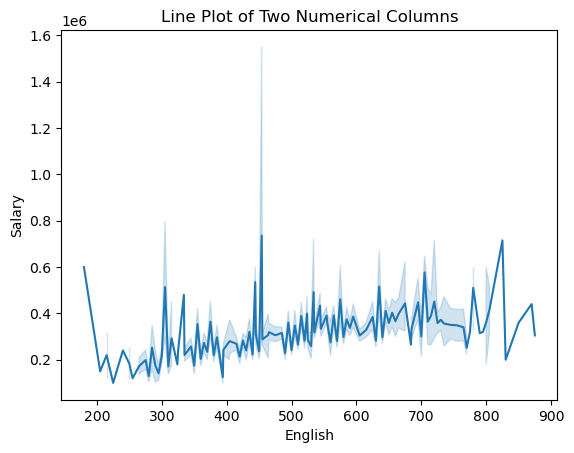

In [46]:
sns.lineplot(data=df, y='Salary', x='English')
plt.xlabel('English')
plt.ylabel('Salary')
plt.title('Line Plot of Two Numerical Columns')
plt.show()


OBSERVATIONS:
- Lineplot –> From the above Lineplot we can say that the people with least
knowledge in english has salary in range of 0.2 to 0.6


### CAT and NUM 

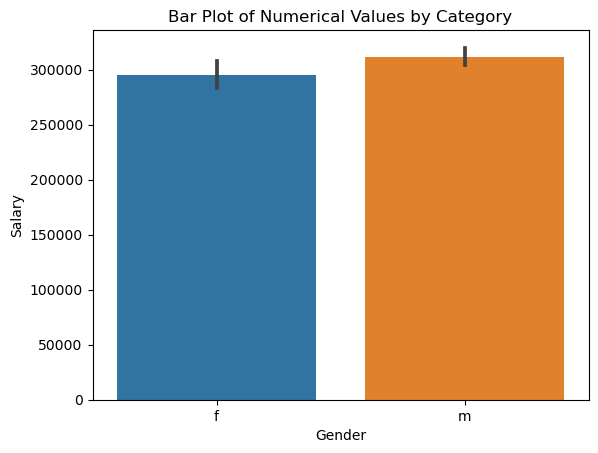

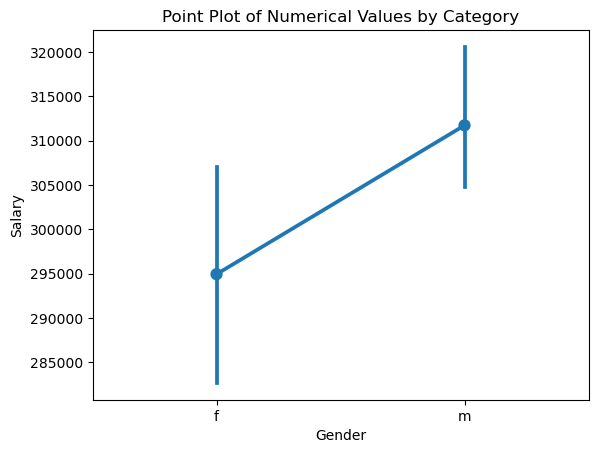

In [48]:
sns.barplot(data=df, x='Gender', y='Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Bar Plot of Numerical Values by Category')
plt.show()
sns.pointplot(data=df, x='Gender', y='Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Point Plot of Numerical Values by Category')
plt.show()


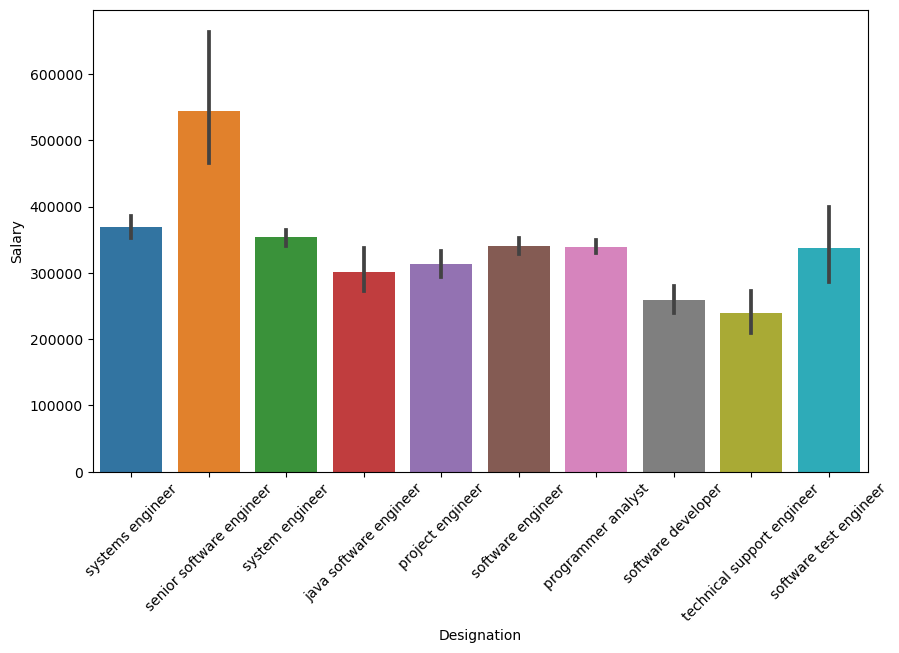

In [51]:
top_designations = df['Designation'].value_counts().nlargest(10).index.tolist() # Adjust the number as needed
# Filter the DataFrame to include only the top designations
df_top = df[df['Designation'].isin(top_designations)]
# Plot the bar plot
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
sns.barplot(data=df_top, x='Designation', y='Salary')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()


OBSERVATIONS: 
 - Barplot –> Senior software engineer has the highest salary followed by
system engineer.

### CAT vs CAT

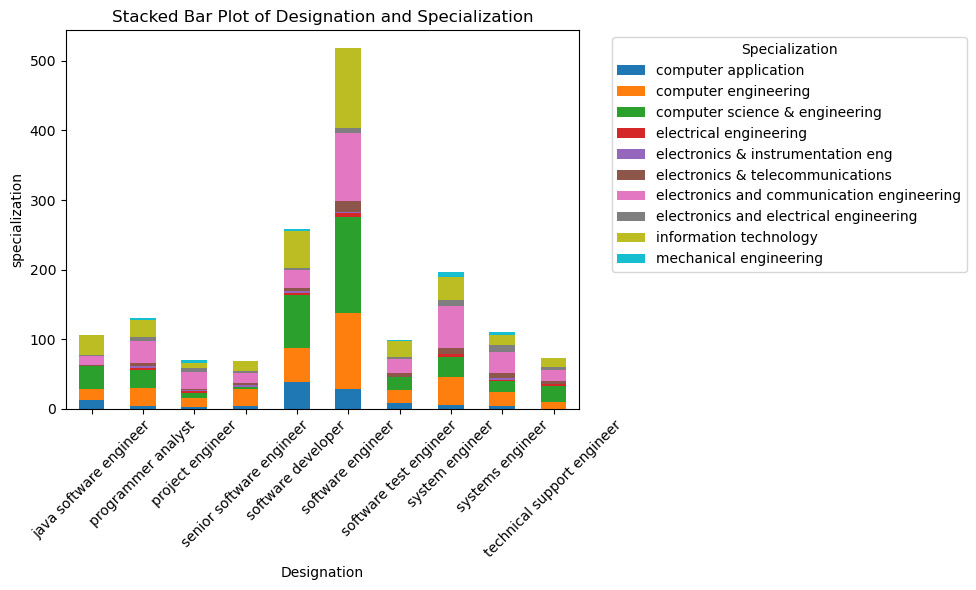

In [53]:
top_designations = df['Designation'].value_counts().nlargest(10).index
top_specializations = df['Specialization'].value_counts().nlargest(10).index
# Filter the DataFrame to include only the most frequent values
filtered_df = df[(df['Designation'].isin(top_designations)) & (df['Specialization'].isin(top_specializations))]
# Create a DataFrame with the counts of each combination of 'designation' and 'specialization'
count_df = filtered_df.groupby(['Designation', 'Specialization']).size().unstack(fill_value=0)
# Plot the stacked bar plot
count_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Designation')
plt.ylabel('specialization')
plt.title('Stacked Bar Plot of Designation and Specialization')
plt.xticks(rotation=45)
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


OBSERVATIONS
 - Stacked Barplot –> From the above plot we can understand that most
software developers are from computer science , electronics and information technology

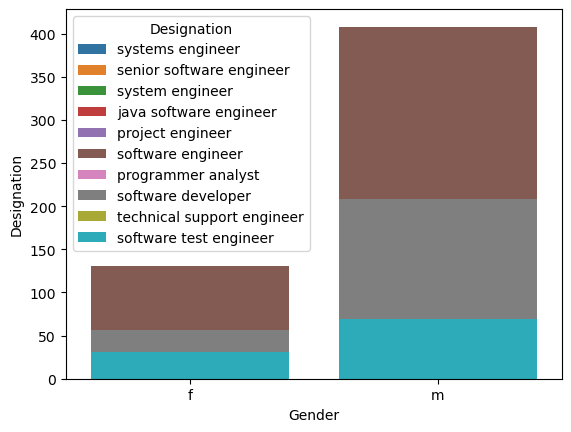

In [54]:
top_designations = df['Designation'].value_counts().nlargest(10).index.tolist()
# Adjust the number as needed
# Filter the DataFrame to include only the top designations
df_top = df[df['Designation'].isin(top_designations)]
sns.countplot(data=df_top, x='Gender', hue='Designation', dodge=False)
plt.xlabel('Gender')
plt.ylabel('Designation')
plt.show()


OBSERVATIONS: 
 - Stacked Barplot –> From the above plot we can tell that compared to
Female large number of Male have the software engineer designation.

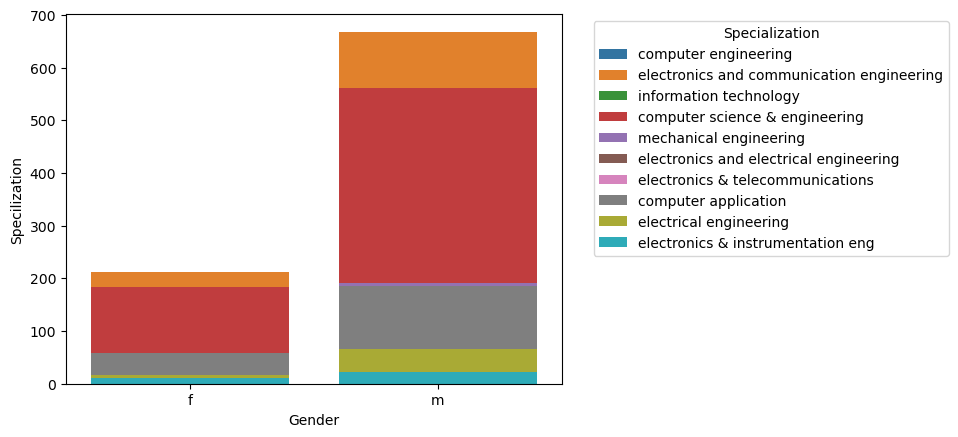

In [55]:
 top_specializations = df['Specialization'].value_counts().nlargest(10).index
df_top1 = df[df['Specialization'].isin(top_specializations)]
sns.countplot(data=df_top1, x='Gender', hue='Specialization', dodge=False)
plt.xlabel('Gender')
plt.ylabel('Specilization')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


We can observe that large number of male has taken computer science and engineering compared
to female.

## Conclusion

Based on the Analysis made and we have found the relationship between the target variable Salary
and other variables. Here are some insights
- Male has the higher salary compared to female - Senior software Engineer has the highest salary
compared to other Designations - Most of the software engineers are from Specilization Computer
science , Electronics , Information Technology